In [1]:
from aimobile.container import AIMobileContainer

In [2]:
container = AIMobileContainer()
container.init_resources()
container.wire(
    modules=[
        __name__,
        "aimobile.container",
        "aimobile.data.acquisition.appstore",
        "aimobile.data.acquisition.appstore.review",
    ]
)

In [3]:
repo = container.data.review_repo()
df = repo.getall()
df.info()
df["id"].value_counts().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6371840 entries, 0 to 6371839
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   app_id       int64 
 2   app_name     object
 3   category_id  int64 
 4   category     object
 5   author       object
 6   rating       int64 
 7   title        object
 8   content      object
 9   vote_sum     int64 
 10  vote_count   int64 
 11  date         object
 12  source       object
dtypes: int64(5), object(8)
memory usage: 632.0+ MB


,id,count
0,1158457475,12
1,1083667168,12
2,1314466961,12
3,1264269069,12
4,1633523690,12
...,...,...
5776164,8558804228,1
5776165,8590478264,1
5776166,8608455959,1
5776167,8616216180,1


In [4]:
import pandas as pd
summary = df["category"].value_counts().reset_index()
df2 = df.groupby(by="category")['app_id'].nunique().to_frame()
df3 = df.groupby(by="category")['rating'].mean().to_frame()
summary = summary.join(df2, on='category')
summary = summary.join(df3, on='category')
summary.columns = ["Category", "Reviews", "Apps", "Ave Rating"]

## Autothrottle

In [5]:
from scipy.stats import expon

lambda_param = 0.5
distribution = expon(scale = 1 / lambda_param)

Text(0.5, 1.0, 'Exponential distribution with lambda = 0.5')

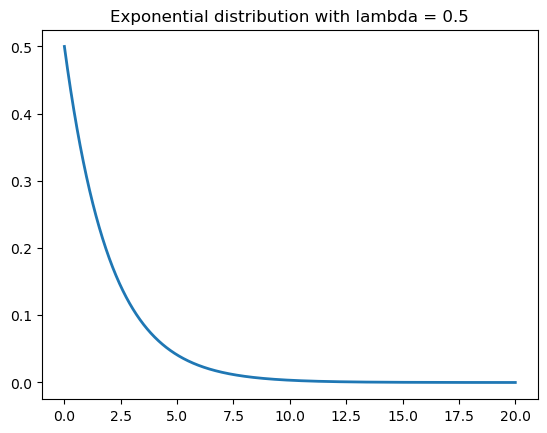

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 20, 2000)
_, ax = plt.subplots(1, 1)
ax.plot(x, distribution.pdf(x), '-', lw=2)
plt.title('Exponential distribution with lambda = 0.5')
plt.show()

array([[<Axes: title={'center': 'Exponential distribution, rate = 0.2, 10000 random values'}>]],
      dtype=object)

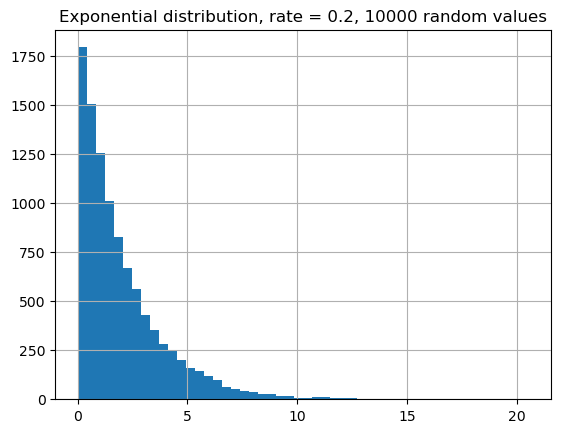

In [7]:
generated_values = distribution.rvs(10000)

import pandas as pd

pd.DataFrame(
    generated_values,
    columns=["Exponential distribution, rate = 0.2, 10000 random values"]
).hist(bins = 50)

In [8]:
from datetime import datetime
h = datetime.now().strftime("%H")
h = int(h)
b = h/6
int(b)

2

In [1]:
class Test:
    @classmethod
    def method1(cls, a,b):
        return a+b
    
    
    def method2(self, c,d):
        return cls.method1(a=c,b=d)

Test.method2(c=1,d=2)

TypeError: Test.method2() missing 1 required positional argument: 'self'